In [1]:
# Install necessary libraries
!pip install numpy scipy pandas matplotlib scikit-learn


  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pandas.plotting import scatter_matrix


In [6]:
# Load dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Summarize dataset
print("Dataset dimensions:", data.shape)
print("\nPeek at data:\n", data.head())
print("\nStatistical summary:\n", data.describe())
print("\nClass distribution:\n", data['species'].value_counts())


Dataset dimensions: (150, 5)

Peek at data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Statistical summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1

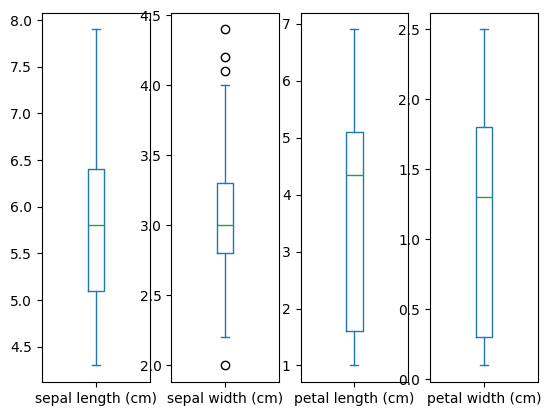

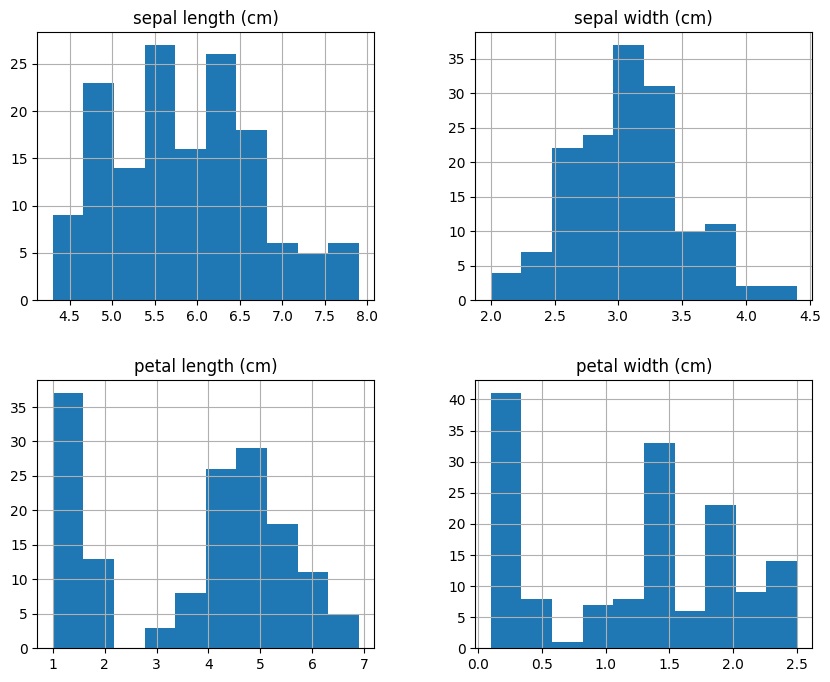

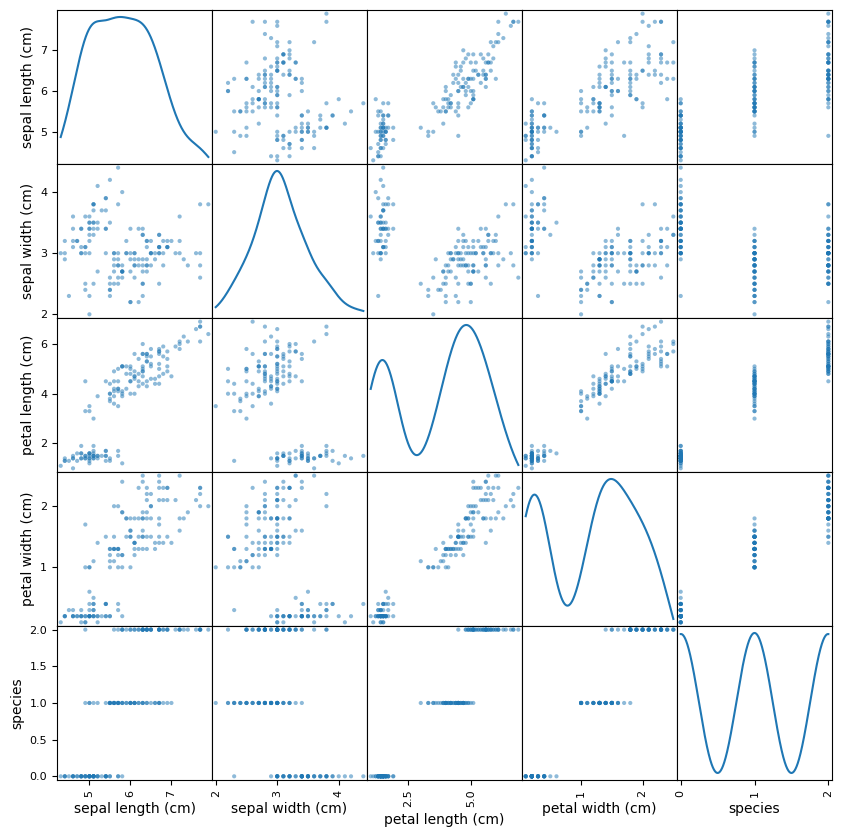

In [9]:
# Univariate plots
# Filter out the non-numeric column 'species' for box plots
numeric_data = data.drop(columns=['species'])

# Box plot
numeric_data.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

# Histogram
numeric_data.hist(figsize=(10, 8))
plt.show()

# Multivariate plots
scatter_matrix(data, figsize=(10, 10), diagonal='kde')
plt.show()


In [10]:
# Prepare for model evaluation
X = data.iloc[:, :-1]
y = data['species']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)
kfold = KFold(n_splits=10, random_state=1, shuffle=True)


In [11]:
# Evaluate algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})')


LR: 0.9667 (0.0408)
LDA: 0.9750 (0.0382)
KNN: 0.9583 (0.0417)
CART: 0.9500 (0.0408)
NB: 0.9500 (0.0408)
SVM: 0.9667 (0.0408)


In [12]:
# Train and make predictions with the best model
best_model = SVC()  # Replace with the best model from above
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_validation)

print("Accuracy:", accuracy_score(y_validation, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_validation, predictions))
print("\nClassification Report:\n", classification_report(y_validation, predictions))

Accuracy: 0.9666666666666667

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

